In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
gifted = pd.read_csv("../data/processed/masterbuild_master.csv")
transcripts = pd.read_csv("../data/processed/transcript_master.csv")

/var/folders/dk/2mw0y5w91dggrsnrpxb04jv80000gn/T/ipykernel_78719/1136845955.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  gifted = pd.read_csv("../data/processed/masterbuild_master.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/transcript_master.csv'

In [ ]:
combined = pd.merge(gifted, transcripts, on="mastid", how="inner")


In [ ]:
combined["final_year"] = combined["reporting_year"].fillna(combined["year"])
combined["year"] = combined["final_year"]
combined.drop(columns=["final_year","reporting_year"],inplace=True)
# Convert to numeric, set non-numeric values to NaN
combined["FINAL_MARK"] = pd.to_numeric(combined["FINAL_MARK"], errors='coerce')

# Drop rows where FINAL_MARK is NaN (i.e., was non-numeric)
combined = combined.dropna(subset=["FINAL_MARK","ACADEMIC_LEVEL_DESC"])
combined.drop(columns=['lea_y'],inplace=True)
combined['lea'] = combined['lea_x']
combined.drop(columns=['lea_x','aig'],inplace=True)



In [ ]:
combined.drop(columns=['schlcode_y'],inplace=True)
combined['schlcode'] = combined['schlcode_x']
combined.drop(columns=['schlcode_x'],inplace=True)

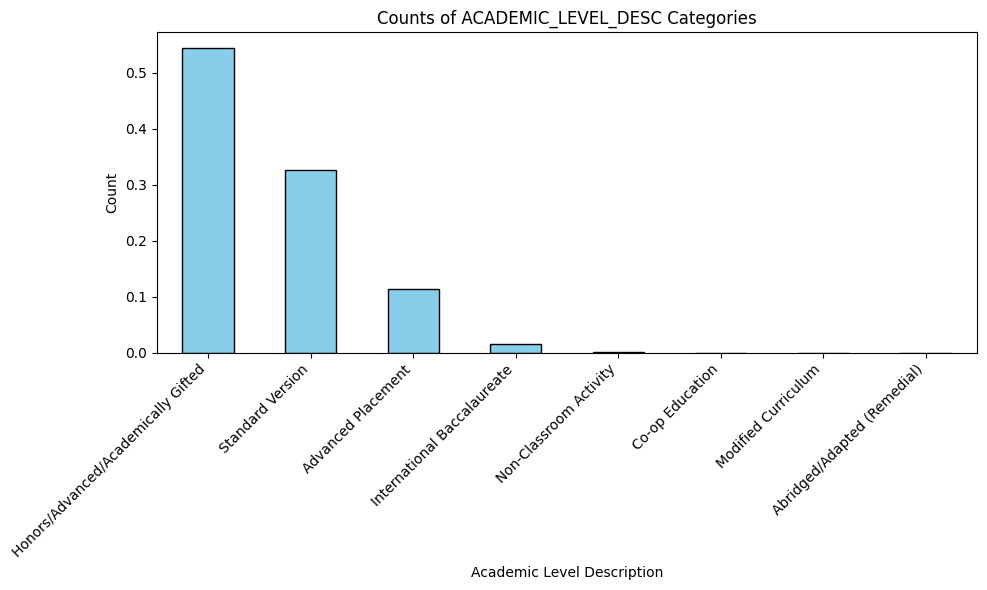

In [ ]:
# Count occurrences of each category
counts = combined['ACADEMIC_LEVEL_DESC'].value_counts(normalize=True)

# Plot as bar chart
counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Counts of ACADEMIC_LEVEL_DESC Categories')
plt.xlabel('Academic Level Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




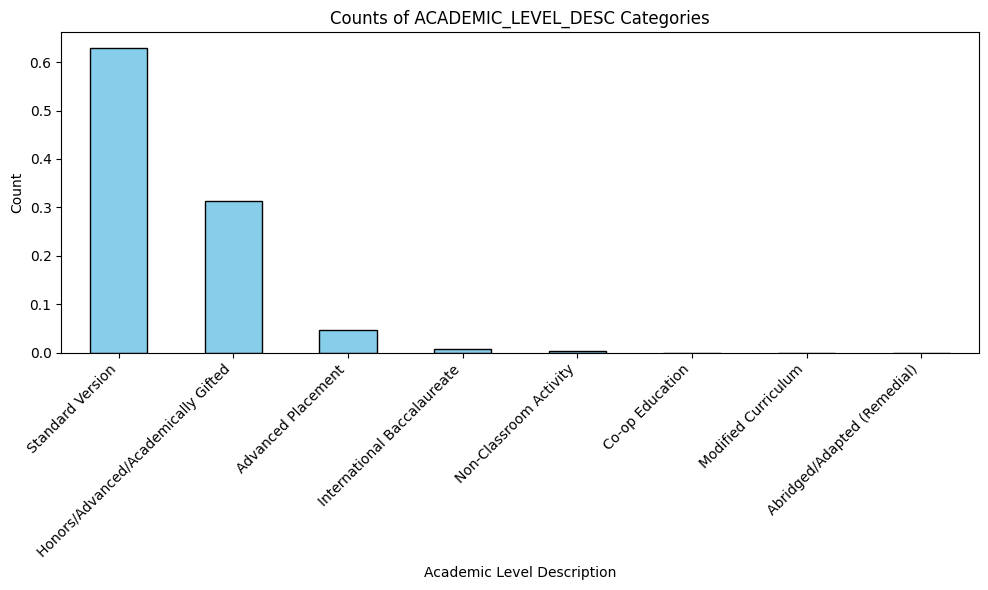

In [ ]:
counts = transcripts['ACADEMIC_LEVEL_DESC'].value_counts(normalize=True)

# Plot as bar chart
counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Counts of ACADEMIC_LEVEL_DESC Categories')
plt.xlabel('Academic Level Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='ACADEMIC_LEVEL_DESC', ylabel='FINAL_MARK'>

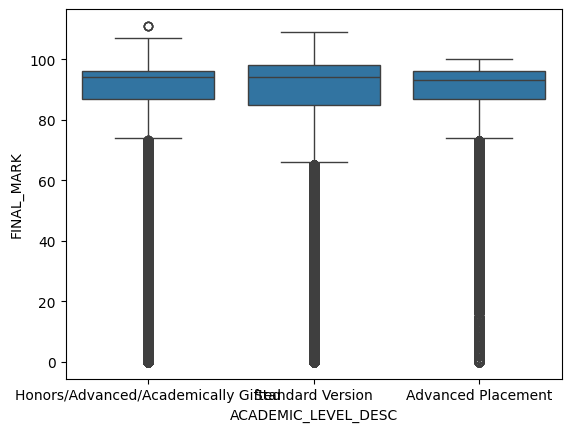

In [ ]:
plot_data = combined.dropna(subset=["FINAL_MARK", "ACADEMIC_LEVEL_DESC"])
top_categories = plot_data['ACADEMIC_LEVEL_DESC'].value_counts().head(3).index
filtered = plot_data[plot_data['ACADEMIC_LEVEL_DESC'].isin(top_categories)]
sns.boxplot(data=filtered, x="ACADEMIC_LEVEL_DESC", y="FINAL_MARK")

In [ ]:
gifted['year'] = gifted['year'].fillna(gifted['reporting_year'])
gifted.drop(columns=['reporting_year'],inplace=True)
gifted


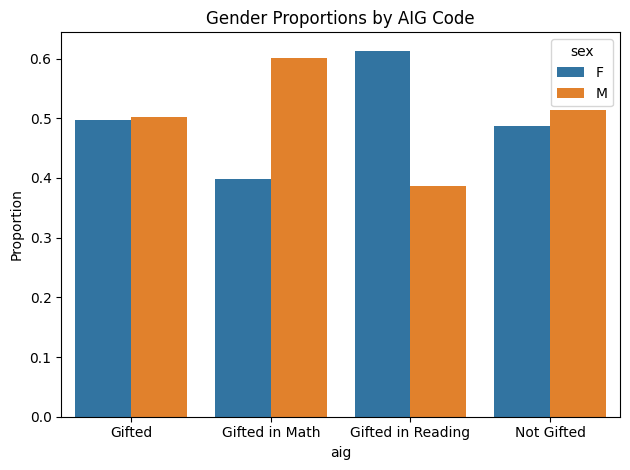

In [13]:
counts = gifted.groupby(['aig', 'sex']).size().reset_index(name='count')
counts['total'] = counts.groupby('aig')['count'].transform('sum')
counts['proportion'] = counts['count'] / counts['total']

# Create bar plot
ax = sns.barplot(data=counts, x='aig', y='proportion', hue='sex')

# Set custom x-axis labels
ax.set_xticks(range(len(counts['aig'].unique())))
ax.set_xticklabels(['Gifted', 'Gifted in Math', 'Gifted in Reading', 'Not Gifted'], rotation=0)

# Add labels and titlea
plt.ylabel('Proportion')
plt.title('Gender Proportions by AIG Code')
plt.tight_layout()
plt.show()

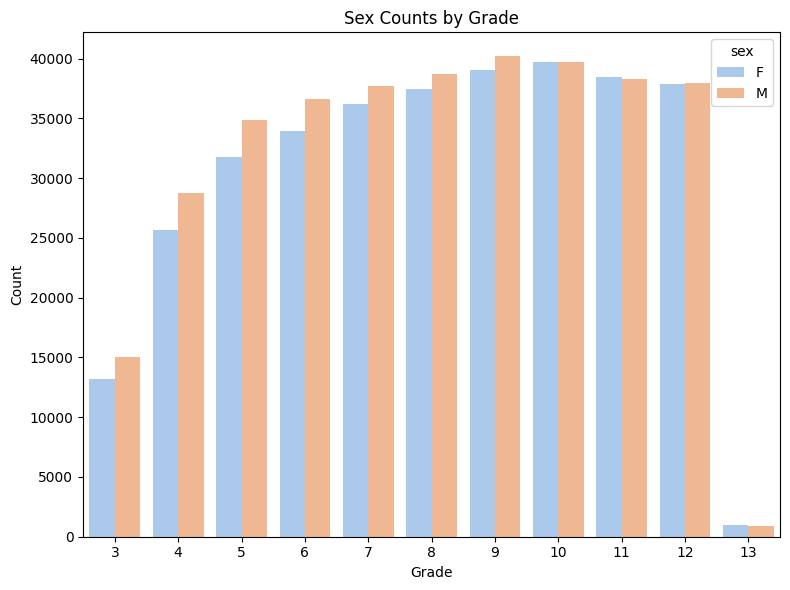

In [ ]:
gifted['grade'] = gifted['grade'].astype(int)

# Count number of students by grade and sex
counts = gifted.groupby(['grade', 'sex']).size().reset_index(name='count')

# Sort by grade
counts = counts.sort_values('grade')

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=counts, x='grade', y='count', hue='sex', palette='pastel')

plt.ylabel('Count')
plt.xlabel('Grade')
plt.title('Sex Counts by Grade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
gifted['aig'] = gifted['aig'].replace({
    'M': 'AM',
    'B': 'AG',
    'I': 'AG',
    'AI': 'AG',
    'R': 'AR',
    'Y': 'AG',
    'IG': 'AG'
})

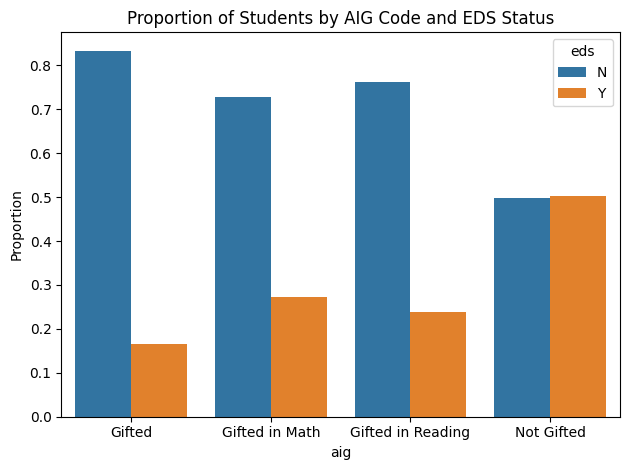

In [16]:
# Group and count by AIG and EDS
counts = gifted.groupby(['aig', 'eds']).size().reset_index(name='count')

# Compute total counts per AIG to get proportions
counts['total'] = counts.groupby('aig')['count'].transform('sum')
counts['proportion'] = counts['count'] / counts['total']

# Create proportion bar plot
ax = sns.barplot(data=counts, x='aig', y='proportion', hue='eds')

# Set custom x-axis labels
ax.set_xticks(range(len(counts['aig'].unique())))
ax.set_xticklabels(['Gifted', 'Gifted in Math', 'Gifted in Reading', 'Not Gifted'], rotation=0)

# Add labels and title
plt.ylabel('Proportion')
plt.title('Proportion of Students by AIG Code and EDS Status')
plt.tight_layout()
plt.show()